In [1]:
import numpy as np
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

In [2]:
w123 = pd.read_csv('hw5data.csv')

In [3]:
w1 = np.array(w123.w1)
w2 = np.array(w123.w2)
w3 = np.array(w123.w3)

# Q1

In [10]:
learnRate = 1e-3
epochs = 50000

In [11]:

GDobj = np.zeros(epochs)
xyz = np.zeros(3)
for ep in range(epochs):
    
    
    grad0 = np.mean(np.exp(w1*xyz[0]+w2*xyz[1])*((xyz[2]-w3)**2)*w1)
    grad1 = np.mean(np.exp(w1*xyz[0]+w2*xyz[1])*((xyz[2]-w3)**2)*w2)
    grad2 = np.mean(np.exp(w1*xyz[0]+w2*xyz[1])*(2*(xyz[2]-w3)))
    grad = np.array([grad0,grad1,grad2])
    
    xyz -= learnRate*grad
    GDobj[ep] = np.mean(np.exp(w1*xyz[0]+w2*xyz[1])*(xyz[2]-w3)**2)
    

print(xyz)
print(GDobj[ep])

[-0.15675855  0.17689576  0.95909562]
0.9840185202021346


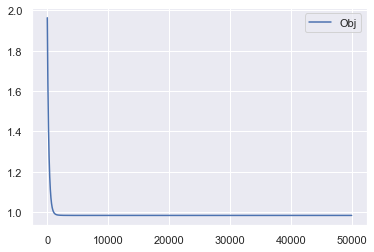

In [12]:
df = pd.DataFrame({'Obj': GDobj})
sns.lineplot(data=df);

# Q2

In [22]:
epochs = 100
dat_per_bat = 10
ndata = len(w123)
batches = int(ndata/dat_per_bat)

In [23]:

SGDobj = np.zeros(epochs)
xyz = np.zeros(3)
np.random.seed(4382)
for ep in range(epochs):
    shuf = np.random.choice(range(ndata),size=ndata,replace=False)
    for bat in range(batches):
        this_bat = shuf[(bat*dat_per_bat):((bat+1)*dat_per_bat)]
        

        grad0 = np.mean(np.exp(w1[this_bat]*xyz[0]+w2[this_bat]*xyz[1])*((xyz[2]-w3[this_bat])**2)*w1[this_bat])
        grad1 = np.mean(np.exp(w1[this_bat]*xyz[0]+w2[this_bat]*xyz[1])*((xyz[2]-w3[this_bat])**2)*w2[this_bat])
        grad2 = np.mean(np.exp(w1[this_bat]*xyz[0]+w2[this_bat]*xyz[1])*(2*(xyz[2]-w3[this_bat])))
        grad = np.array([grad0,grad1,grad2])
        xyz -= learnRate*grad

    SGDobj[ep] = np.mean(np.exp(w1*xyz[0]+w2*xyz[1])*(xyz[2]-w3)**2)
print(SGDobj[ep])


0.985079280305462


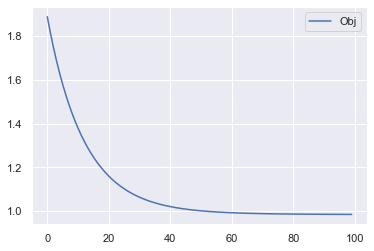

In [24]:
df = pd.DataFrame({'Obj': SGDobj})
sns.lineplot(data=df);

# Q3

In [25]:
theta1 = 0.9
theta2 = 0.999
e=1e-12

In [43]:
epochs = 200
ADAMobj = np.zeros(epochs)
xyz = np.zeros(3)
k = 1
m = np.zeros(3)
v = np.zeros(3)
np.random.seed(11492)
for ep in range(epochs):
    shuf = np.random.choice(range(ndata),size=ndata,replace=False)
    for bat in range(batches):
        this_bat = shuf[(bat*dat_per_bat):((bat+1)*dat_per_bat)]
        

        grad0 = np.mean(np.exp(w1[this_bat]*xyz[0]+w2[this_bat]*xyz[1])*((xyz[2]-w3[this_bat])**2)*w1[this_bat])
        grad1 = np.mean(np.exp(w1[this_bat]*xyz[0]+w2[this_bat]*xyz[1])*((xyz[2]-w3[this_bat])**2)*w2[this_bat])
        grad2 = np.mean(np.exp(w1[this_bat]*xyz[0]+w2[this_bat]*xyz[1])*(2*(xyz[2]-w3[this_bat])))
        grad = np.array([grad0,grad1,grad2])
        
        m = theta1*m + (1-theta1)*grad
        mhat = m/(1-theta1**k)
        
        v = theta2*v + (1-theta2)*(grad**2)
        vhat = v/(1-theta2**k)

        xyz -= learnRate*mhat/(np.sqrt(vhat)+e)
        k += 1

    
    ADAMobj[ep] = np.mean(np.exp(w1*xyz[0]+w2*xyz[1])*(xyz[2]-w3)**2)
print(ADAMobj[ep])

0.9840312418903556


In [45]:
np.argmax(np.round(ADAMobj, 3) <= np.round(GDobj[-1], 3))

123

In [46]:
GDobj[-1]

0.9840185202021346